# KNN -  EXERCÍCIO EXTRA !!!

### Disciplina Inteligência Artificial


Aplique o KNN para o dataset wine utilizado no exercício 02 de regressão logística, salvando o resultado em um novo Notebook

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

## Carregando o dataset

In [ ]:
# Carregando o dataset do sklearn
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
# Vendo o shape
print('Data:',wine.data.shape)
print('Target:',wine.target.shape)

Data: (178, 13)
Target: (178,)


Veja que são 178 exemplos, 13 variáveis preditoras e 1 variável Alvo (Target)

In [ ]:
# Nome das colunas preditoras
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# classes alvo (TARGET)
wine.target_names.tolist()

['class_0', 'class_1', 'class_2']

In [ ]:
# Mostrando as primeiras 5 linhas do dataset
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Vamos verificar se existem valores nulos
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# Imprimindo o describe()
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df['Target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Explorando o Dataset

In [ ]:
# Distribuição do target
df['Target'].value_counts()

1    71
0    59
2    48
Name: Target, dtype: int64

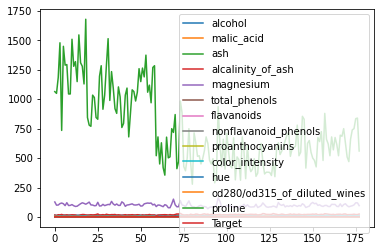

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

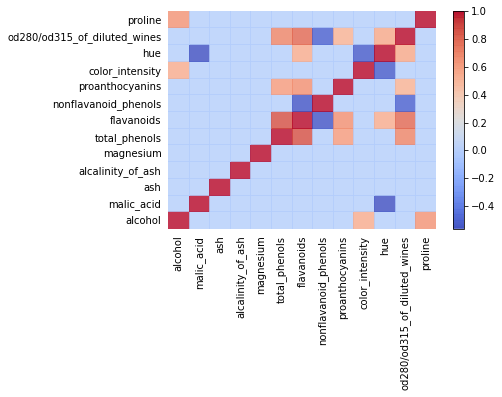

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis
tmp = df.drop('Target', axis=1)
matriz_corr = tmp.corr()
observations = len(tmp)
variables = tmp.columns
visualize_correlation_matrix(tmp, hurdle = 0.5)

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-1]
y = df['Target'].values

In [ ]:
# Imprimindo os primeiros valores de X
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(178, 13)
(178,)


## KNN (K – Nearest Neighbours)

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (124, 13)
y_train: (124,)
X_test: (54, 13)
y_test: (54,)


In [ ]:
# Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# prevendo valores para X_test
y_pred = knn.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (54,)


In [ ]:
# Imprimindo o Score para os dados de teste
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K = 5")

Accuracy is  61.111111111111114 % for K = 5


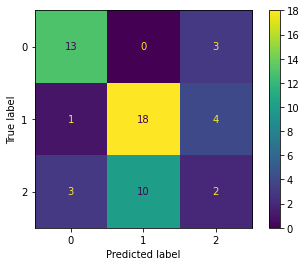

In [ ]:
# Imprimindo a matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)

In [ ]:
# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

Accuracy: 0.6111111111111112
Precision: 0.6838063607085347
Recall: 0.6111111111111112
F1 Score: 0.6418267643757839


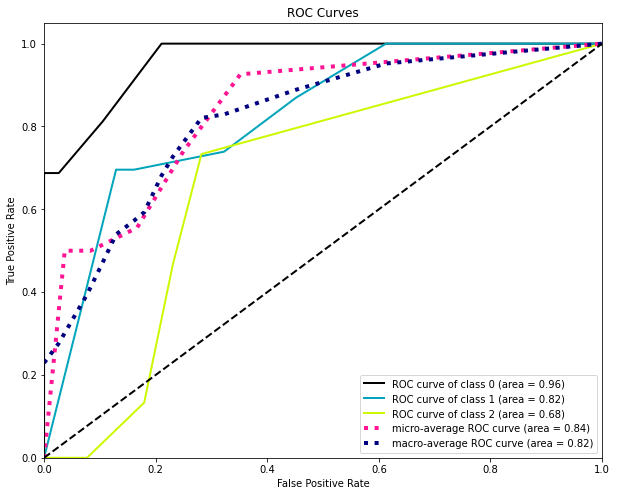

In [ ]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = knn.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

In [ ]:
# Finalmente, vamos executar o mesmo processo com vários valores de K para ver se conseguimos aumentar a precisão
results_x = []
results_y = []
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)    

Accuracy is  66.66666666666666 % for K-Value: 1
Accuracy is  64.81481481481481 % for K-Value: 2
Accuracy is  61.111111111111114 % for K-Value: 3
Accuracy is  62.96296296296296 % for K-Value: 4
Accuracy is  61.111111111111114 % for K-Value: 5


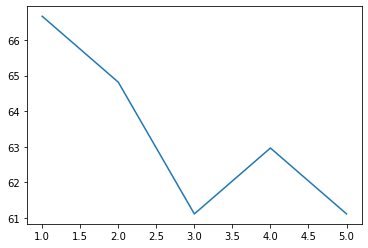

In [ ]:
# Finalmente, vamos plotar o resultado da acurácia versos o valor de K
plt.plot(results_x,results_y)

FIM